In [263]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx

In [264]:
# Define the parameters

beta_b = 1.5
beta_w = 1.5
gamma_p = 0.3
epsilon = 0.3
mu = 1

In [265]:




# Define the system of ODEs
def system(y, t, p):
    # Define compartments
    V, B, C, W, C_b, W_b, P = y
    # Total population
    N = sum(y)
    # Total b infected 
    B_t = (B + C_b + W_b)
    # Total w infected
    W_t = (W + W_b)

   
    # First equation 
    dV = -p['beta_b']*V*B_t/N - p['beta_w']*V*W_t/N 
    # Second equation 
    dB = p['beta_b']*V*B_t/N - p['beta_w']*B*W_t/N 
    # Third equation   
    dC = p['beta_w']*V*W_t/N - p['beta_b']*C*B_t/N - p['epsilon']*C - p['gamma_p']*C
    # Fourth equation
    dW = p['epsilon']*C - p['beta_b']*W*B_t/N - p['mu']*W 
    # Fifth equation
    dC_b = p['beta_w']*B*W_t/N + p['beta_b']*C*B_t/N - p['gamma_p']*C_b - p['epsilon']*C_b
    # Sixth equation
    dW_b = p['beta_b']*W*B_t/N + p['epsilon']*C_b - p['mu']*W_b
    # Seventh equation
    dP =  p['gamma_p']*(C + C_b) + p['mu']*W + p['mu']*W_b

    # Return array 
    return [dV, dB, dC, dW, dC_b, dW_b, dP]



In [266]:
n = 10000

# Initial conditions
V0 = n-2
B0 = 1
C0 = 1
W0 = 0
C_b0 = 0
W_b0 = 0
P0 = 0


y0 = [V0, B0, C0, W0, C_b0, W_b0, P0]


duration = 2000
# Time vector
t = np.linspace(0, duration, duration)

# Parameters
p = {'beta_b': beta_b, 'beta_w': beta_w, 'gamma_p': gamma_p, 'epsilon': epsilon, 'mu': mu}

# Integrate the system of ODEs
result = odeint(system, y0, t, args=(p,))

In [267]:
gammas = [0.1, 1, 10]

#gammas = [0.1]

In [268]:
result = odeint(system, y0, t, args=(p,))

In [269]:
protected_matrix  = np.zeros((len(gammas),150))

for i, gamma in enumerate(gammas):
    epsilons = np.linspace(gamma/10000, gamma*100, 150)
    for j, epsilon in enumerate(epsilons):
        p['gamma_p'] = gamma
        p['epsilon'] = epsilon
        result = odeint(system, y0, t, args=(p,))
        relation = result[-1][-1]

        protected_matrix[i][j] = relation

In [270]:
epsilon_gamma = np.logspace(-4, 2, 150)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


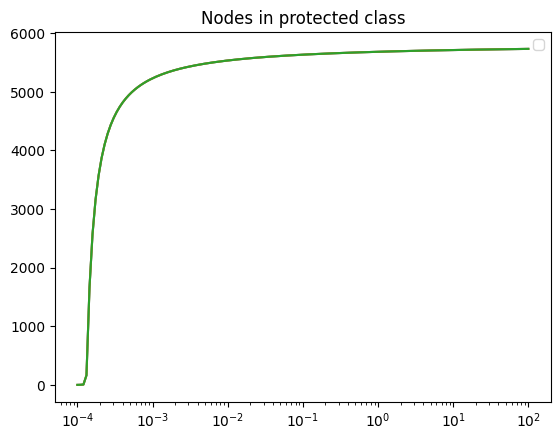

In [271]:
# create a new figure
plt.figure()

# plot each row with a label
for i, row in enumerate(protected_matrix):
    plt.plot(epsilon_gamma, row)

# set the title of the plot
plt.title('Nodes in protected class')

# add a legend
plt.legend()

# set the x-axis scale to log 
plt.xscale('log')

# set the y-axis scale
#plt.ylim([0,105])

# show the plot
plt.show()